## 09/08/2024

## Friday

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path=r"C:\Users\Admin\OneDrive\Documents\NARESH IT FSDS\Data Sets\Visadataset.csv"
visa_df=pd.read_csv(path)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [3]:
cat_columns=visa_df.select_dtypes(include='object').columns
num_columns=visa_df.select_dtypes(exclude='object').columns
num_columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

**Box plot**

- Box plot is used to identify the outliers

- Outlier is an observation having huge positive value or huge nagative value

- Q1 = 25p, Q2=50p, Q3=75p

- IQR = Inter quartile range = Q3-Q1

- Q3+1.5*IQR and Q1-1.5*IQR

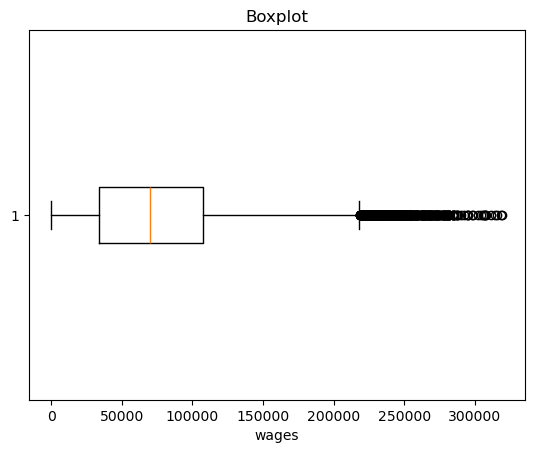

In [4]:
# Read the prevailing_wage data and the box plot

wage_data=visa_df['prevailing_wage']
plt.boxplot(wage_data,vert=False)
plt.title('Boxplot')
plt.xlabel('wages')
plt.show()

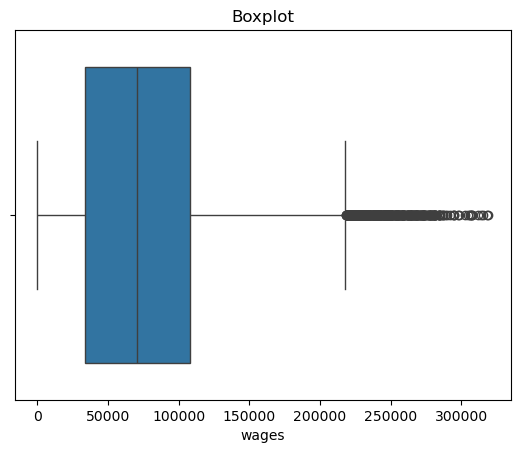

In [5]:
wage_data=visa_df['prevailing_wage']
sns.boxplot(wage_data,orient='h')
plt.title('Boxplot')
plt.xlabel('wages')
plt.show()

**plot the histogram plot and box plot side by side**

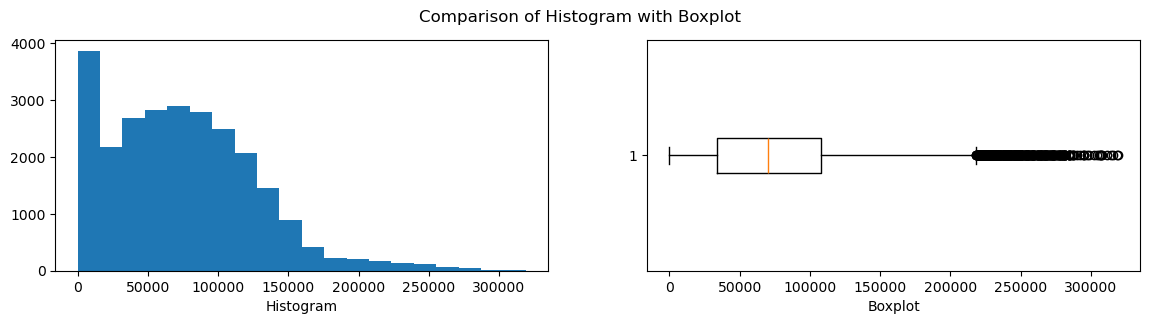

In [6]:
wage_data=visa_df['prevailing_wage']
plt.figure(figsize=(14,3))
plt.suptitle('Comparison of Histogram with Boxplot')
plt.subplot(1,2,1)
plt.hist(wage_data,bins=20)
plt.xlabel('Histogram')
plt.subplot(1,2,2)
plt.boxplot(wage_data,vert=False)
plt.xlabel('Boxplot')
plt.show()

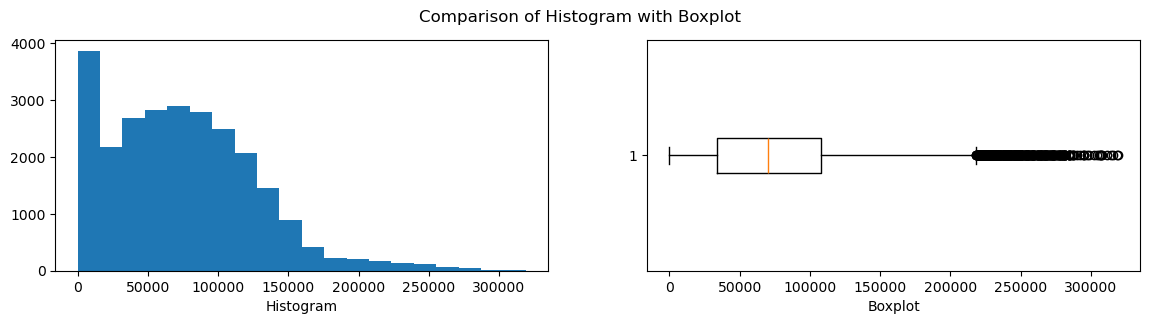

In [7]:
wage_data=visa_df['prevailing_wage']
plt.figure(figsize=(14,3))
plt.suptitle('Comparison of Histogram with Boxplot')
plt.subplot(1,2,1).hist(wage_data,bins=20)
plt.xlabel('Histogram')
plt.subplot(1,2,2).boxplot(wage_data,vert=False)
plt.xlabel('Boxplot')
plt.show()

**Finding the Outliers**

- We already know that outliers available less than Q1-1.5*IQR and Q3+1.5*IQR

- Step-1:

    - Calculate Q1 =25p
 
    - Calculate Q2 =50p
 
    - Calculate Q3 =75p

- Step-2:

    - Calculate IQR= Q3-Q1
 
- Step-3:

    - Calculate LB= Q1-1.5*IQR
 
    - Calculate UB= Q3+1.5*IQR
 
- Step-4:

    - Con1= wage data <LB
 
    - Con2= wage data >UB
 
    - Con3= Con1 or-and con2 (Use bitwise operator)

- Step-5: Data [Con3]

In [8]:
wage_25p=round(np.percentile(visa_df['prevailing_wage'],25),2)
wage_50p=round(np.percentile(visa_df['prevailing_wage'],50),2)
wage_75p=round(np.percentile(visa_df['prevailing_wage'],75),2)
print("25p value is:",wage_25p)
print("50p value is:",wage_50p)
print("75p value is:",wage_75p)

25p value is: 34015.48
50p value is: 70308.21
75p value is: 107735.51


In [9]:
Q1=round(np.percentile(visa_df['prevailing_wage'],25),2)
Q2=round(np.percentile(visa_df['prevailing_wage'],50),2)
Q3=round(np.percentile(visa_df['prevailing_wage'],75),2)

In [10]:
IQR=Q3-Q1
IQR

73720.03

In [11]:
LB= Q1-1.5*IQR
LB

-76564.565

In [12]:
UB= Q3+1.5*IQR
UB

218315.555

In [13]:
wage_data=visa_df['prevailing_wage']
Con1 = wage_data<LB
Con2 = wage_data>UB

Con3 = Con1&Con2



In [33]:
wage_data=visa_df['prevailing_wage']
# step-1
q1=np.percentile(wage_data,25)
q2=np.percentile(wage_data,50)
q3=np.percentile(wage_data,75)
# Step-2:
IQR= q3-q1
# Step-3:
LB= Q1-1.5*IQR
ub=q3+1.5*IQR
#Step-4:
con1=wage_data>LB # T F
con2=wage_data<UB # T F
con3=con1&con2
# Bitwise operators used to compare
# Bits data === 0 and 1 == True false
#Step-3:
#np.logical_and(Con1, Con2)
non_outliers_df=visa_df[con3]
non_outliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [14]:
Con3

0        False
1        False
2        False
3        False
4        False
         ...  
25475    False
25476    False
25477    False
25478    False
25479    False
Name: prevailing_wage, Length: 25480, dtype: bool

In [15]:
wage_data=visa_df['prevailing_wage']
Con1 = wage_data<LB
Con2 = wage_data>UB

Con3 = Con1|Con2

In [16]:
Con3

0        False
1        False
2        False
3        False
4        False
         ...  
25475    False
25476     True
25477    False
25478    False
25479    False
Name: prevailing_wage, Length: 25480, dtype: bool

In [17]:
# Bitwise operators used to compare
# Bits data === 0 and 

In [18]:
outliers_data=wage_data[Con3]
outliers_data

14       220081.73
34       225569.73
130      247393.01
216      269321.68
221      219529.62
           ...    
25191    280482.51
25195    234308.77
25468    272715.74
25469    273772.47
25476    279174.79
Name: prevailing_wage, Length: 427, dtype: float64

In [19]:
wage_data=visa_df['prevailing_wage']
wage_data

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476    279174.7900
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64

- we have two dataframe

- visa_df : Total

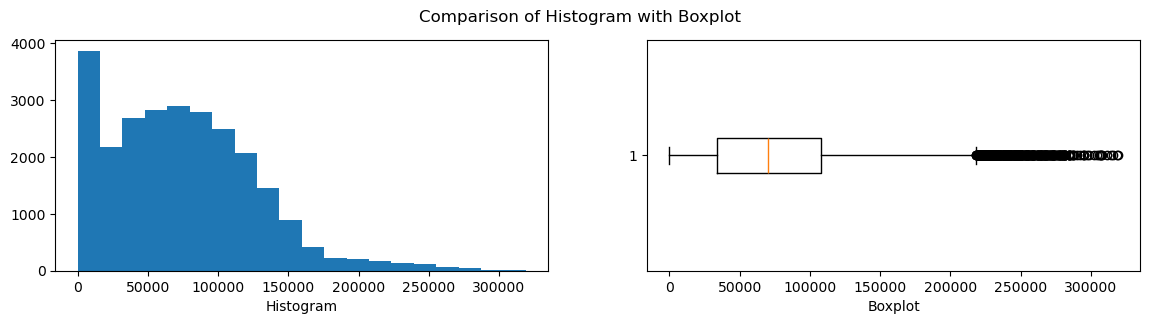

In [27]:
wage_data_non_outliers=visa_df['prevailing_wage']
plt.figure(figsize=(14,3))
plt.suptitle('Comparison of Histogram with Boxplot')
plt.subplot(1,2,1)
plt.hist(wage_data_non_outliers,bins=20)
plt.xlabel('Histogram')
plt.subplot(1,2,2)
plt.boxplot(wage_data_non_outliers,vert=False)
plt.xlabel('Boxplot')
plt.show()

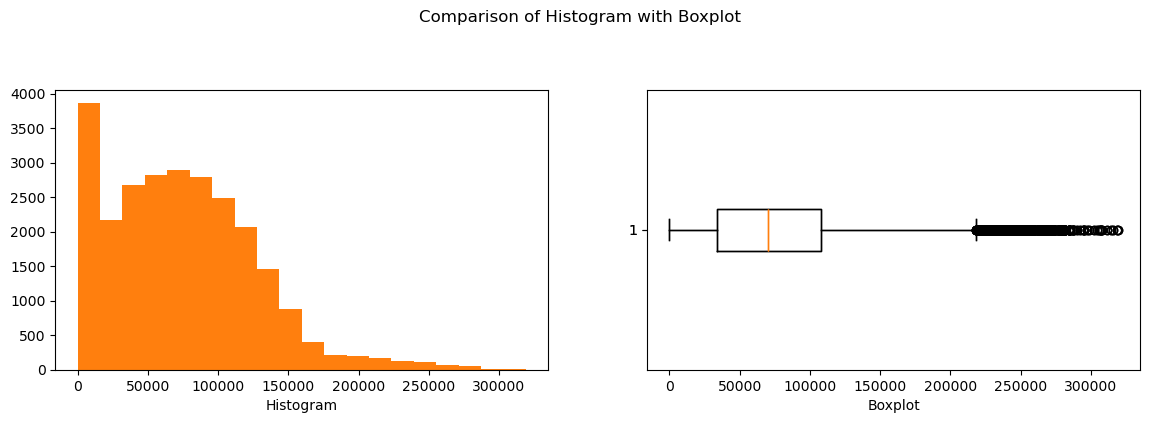

In [31]:
wage_data_non_outliers_df=visa_df['prevailing_wage']
wage_data=visa_df['prevailing_wage']


plt.figure(figsize=(14,8))
plt.suptitle('Comparison of Histogram with Boxplot')
plt.subplot(2,2,1).hist(wage_data_non_outliers,bins=20)
plt.xlabel('Histogram')
plt.subplot(2,2,2).boxplot(wage_data_non_outliers,vert=False)
plt.xlabel('Boxplot')

plt.subplot(2,2,1).hist(wage_data,bins=20)
plt.xlabel('Histogram')
plt.subplot(2,2,2).boxplot(wage_data,vert=False)
plt.xlabel('Boxplot')

plt.show()

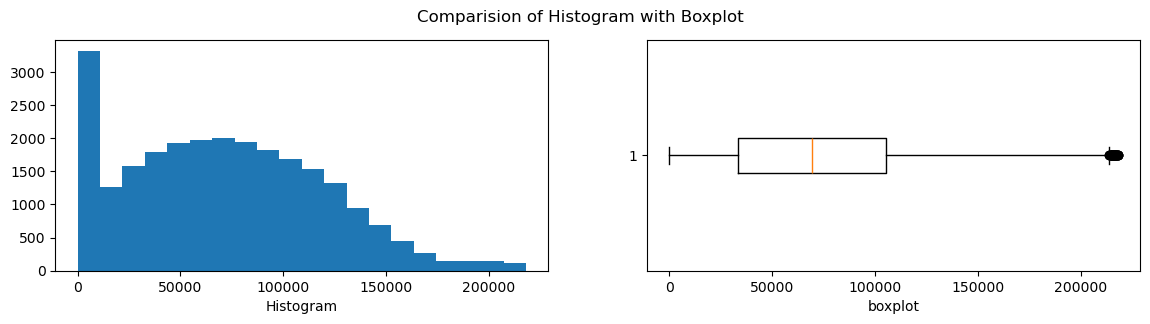

In [34]:
wage_data_non_outliers=non_outliers_df['prevailing_wage']
plt.figure(figsize=(14,3))
plt.suptitle('Comparision of Histogram with Boxplot')
plt.subplot(1,2,1).hist(wage_data_non_outliers,bins=20)
plt.xlabel('Histogram')
plt.subplot(1,2,2).boxplot(wage_data_non_outliers,vert=False)
plt.xlabel('boxplot')
plt.show()

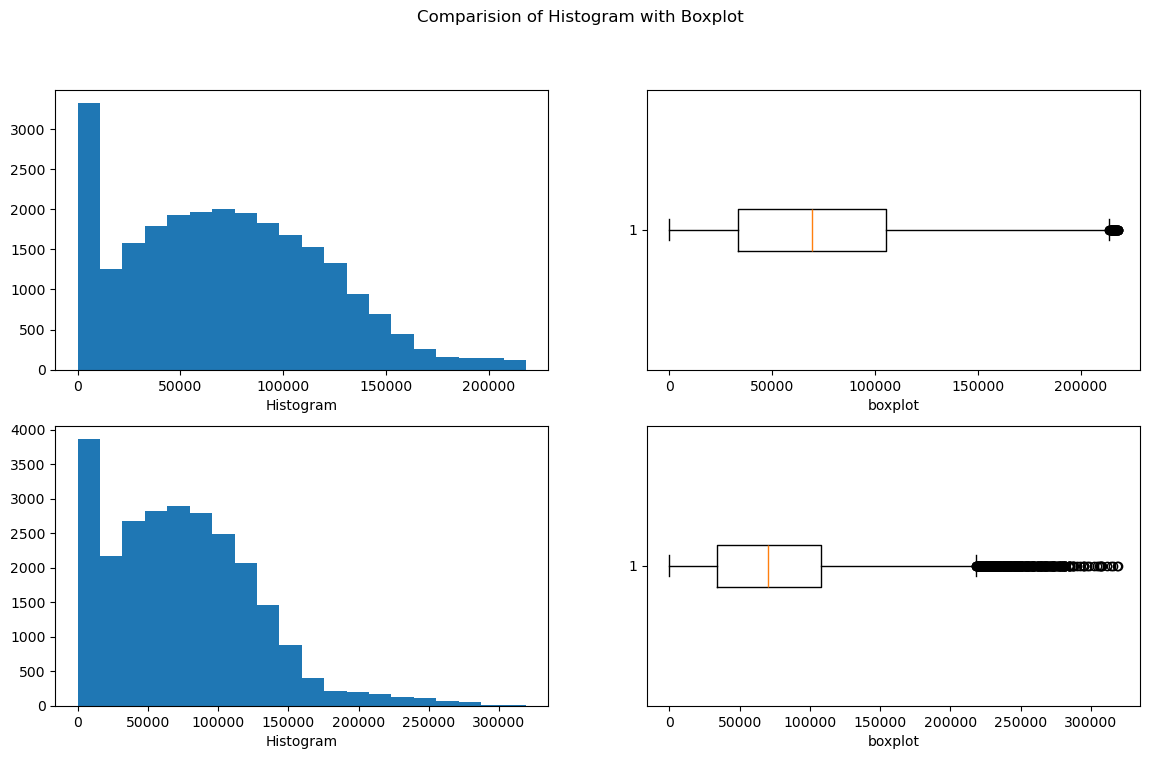

In [35]:
################### data #######################################
wage_data_non_outliers=non_outliers_df['prevailing_wage']
wage_data=visa_df['prevailing_wage']
################# Non outliers######################################
plt.figure(figsize=(14,8))
plt.suptitle('Comparision of Histogram with Boxplot')
plt.subplot(2,2,1).hist(wage_data_non_outliers,bins=20)
plt.xlabel('Histogram')
plt.subplot(2,2,2).boxplot(wage_data_non_outliers,vert=False)
plt.xlabel('boxplot')
###################### Entire data ################################
plt.subplot(2,2,3).hist(wage_data,bins=20)
plt.xlabel('Histogram')
plt.subplot(2,2,4).boxplot(wage_data,vert=False)
plt.xlabel('boxplot')
plt.show()

## 12/08/2024

## Monday

In [ ]:
#or and

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
path=r"C:\Users\Admin\OneDrive\Documents\NARESH IT FSDS\Data Sets\Visadataset.csv"
visa_df=pd.read_csv(path)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [24]:
cat_columns=visa_df.select_dtypes(include='object').columns
num_columns=visa_df.select_dtypes(exclude='object').columns
num_columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

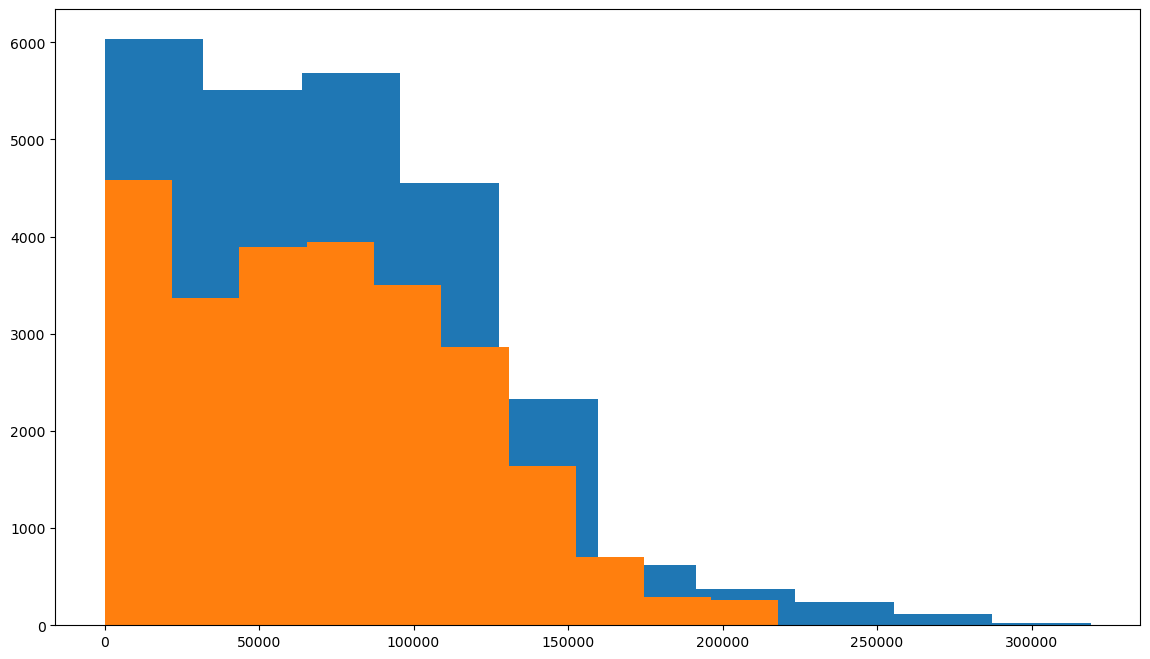

In [39]:
################### data #######################################
wage_data_non_outliers=non_outliers_df['prevailing_wage']
wage_data=visa_df['prevailing_wage']
################# Non outliers######################################
plt.figure(figsize=(14,8))
plt.hist(wage_data)
plt.hist(wage_data_non_outliers)
plt.show()

**How to deal outliers**

- 1. We can drop the outliers
 
     - Dropping outliers is an easy task, but not recomended
    
     - If you drop the outliers we are droping the rows
    
     - which means we are dropping the other column values also
    
     - May be some important information we might loose from other column values
    
     - But in industry if outlier percentage less than 20% of the total data, we can drop
    
     - The number of outliers in pwage is 427
    
     - The number of total observations are 25480
    
     - The percentage is 1.67 which is less than 2%
    
- 2. Fill with Median value
 
     - we already know that outliers doen not affect by median
    
     - so it is the best practice to fill the outliers with median
    
- 3. Capping or Florring
 
     - Instead of fill with median
    
     - We can fill with certain values
    
     - the outliers which are less than LB fill with LB value
    
     - The outliers which are greater than UB fill with UB values
    
- **Isolation Forest**

    - Is ML model used to find the outliers and anamolies

**Fill with Median Value**

In [ ]:
#homework

**np.where**

- In numpy we have method called where

- It takes three arguments

    - 1. Condition
     
    - 2. Value if Condition is True
     
    - 3. Value if Condition is False
     
- It is applicable for only Binary means if and else

In [41]:

# list1=[]
# for value in wage_data:
#     if value < LB or value > UB:
#         median=wage_data.median()
#         list1.append(median)
#     else:
#         list1.append(value)

In [44]:
dict1={'Sub':['DS','DE','CS'],
   'marks':[100,200,300]}
df=pd.DataFrame(dict1)
df

,Sub,marks
0,DS,100
1,DE,200
2,CS,300


In [46]:
# Qn: I want to replace marks with 1, which are greater than 100

l=[]
for i in df.marks:
    if i>100:
        l.append(1)
    else:
        l.append(i)

df['marks']=l
df



,Sub,marks,New
0,DS,100,100
1,DE,1,1
2,CS,1,1


In [47]:
dict1={'Sub':['DS','DE','CS'],
   'marks':[100,200,300]}
df=pd.DataFrame(dict1)
df

,Sub,marks
0,DS,100
1,DE,200
2,CS,300


In [48]:
# np.where (<condition>,<True>,<False>)

con=df['marks']>100
l=np.where(con,1,df['marks'])
df['marks']=l
df

,Sub,marks
0,DS,100
1,DE,1
2,CS,1


In [50]:
#Implement for the outliers

wage_data=visa_df['prevailing_wage']
con1 = wage_data<LB
con2 = wage_data>UB
con = con1 | con2
wage_med=wage_data.median()
l=np.where(con,wage_med,wage_data)
l

array([   592.2029,  83425.65  , 122996.86  , ..., 146298.85  ,
        86154.77  ,  70876.91  ])

In [51]:
visa_df['prevailing_wage_update']=l

(array([4580., 3368., 3890., 4369., 3507., 2860., 1643.,  706.,  295.,
         262.]),
 array([2.13670000e+00, 2.18113840e+04, 4.36206314e+04, 6.54298787e+04,
        8.72391260e+04, 1.09048373e+05, 1.30857621e+05, 1.52666868e+05,
        1.74476115e+05, 1.96285363e+05, 2.18094610e+05]),
 <BarContainer object of 10 artists>)

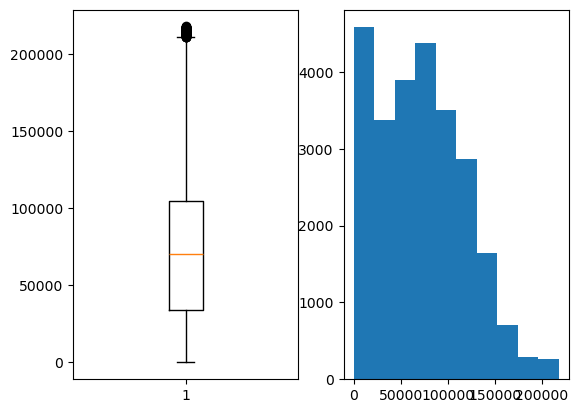

In [55]:

plt.subplot(1,2,1).boxplot(visa_df['prevailing_wage_update'])
plt.subplot(1,2,2).hist(visa_df['prevailing_wage_update'])